In [5]:
import pandas as pd  
df = pd.read_csv("Heart_Attack_Analysis_Data.csv")

# Replace ECG value=2 with value=1
# Assumption: ECG=0 means Normal and ECG=1 means Abnormal
df['ECG'] = df['ECG'].replace([2],1)
df[df.ECG == 2]

Empty DataFrame
Columns: [Age, Sex, CP_Type, BloodPressure, Cholestrol, BloodSugar, ECG, MaxHeartRate, ExerciseAngia, FamilyHistory, Target]
Index: []

In [49]:
data_svm = df.copy(deep=True)
# Setting random state parameter
rd = 5
# Initializing test size
t_size = 0.3

In [50]:
# Import required modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [51]:
# Normalizing continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
to_scale = ['Age', 'BloodPressure', 'Cholestrol', 'MaxHeartRate']
scaler.fit(data_svm[to_scale])
data_svm.loc[:, to_scale] = scaler.transform(data_svm[to_scale])

In [52]:
# Splitting the dataset into training and test samples
X_svm = data_svm.loc[:, data_svm.columns != 'Target']
y_svm = data_svm.loc[:, data_svm.columns == 'Target']
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=t_size, random_state=rd)
columns = X_train_svm.columns
#print(X_train_svm.columns)
#print(X_test_svm.columns)
#print(y_test_svm.columns)

In [53]:
# Initializing Support Vector Machine and fitting the training data
from sklearn.svm import SVC

# Results of Hyperparameter tuning: 'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'
classifier = SVC(C=0.1, gamma='scale', kernel='poly', random_state = 1, probability=True)
classifier.fit(X_train_svm,y_train_svm.values.ravel())

SVC(C=0.1, kernel='poly', probability=True, random_state=1)

In [54]:
# Predicting the classes for test set
y_pred_test_svm = classifier.predict(X_test_svm)

In [55]:
# Calculating the accuracy of the predictions with test data
from sklearn.metrics import confusion_matrix
confusion_matrix_svm = confusion_matrix(y_test_svm,y_pred_test_svm)
accuracy = float(confusion_matrix_svm.diagonal().sum())/len(y_test_svm)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7912087912087912


Text(0.5, 257.44, 'Predicted label')

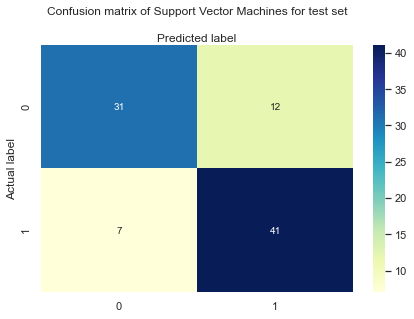

In [67]:
# Visualize heatmap of confusion matrix of test set
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=['Less Chance of HA','High Chance of HA'] # name  of classes
#class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Support Vector Machines for test set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
# Check Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_svm, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        43
           1       0.77      0.85      0.81        48

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



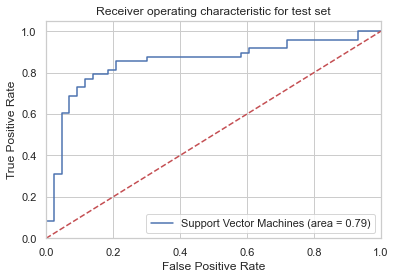

In [69]:
# Look at ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_svm, classifier.predict(X_test_svm))
fpr, tpr, thresholds = roc_curve(y_test_svm, classifier.predict_proba(X_test_svm)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machines (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
# Calculating the accuracy of the predictions with test data
from sklearn.metrics import confusion_matrix
# Predicting the classes for test set
y_pred_train_svm = classifier.predict(X_train_svm)
confusion_matrix_train_svm = confusion_matrix(y_train_svm,y_pred_train_svm)

Text(0.5, 257.44, 'Predicted label')

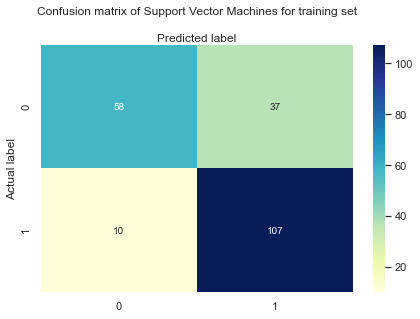

In [65]:
# Visualize heatmap of confusion matrix of test set
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=['Less Chance of HA','High Chance of HA'] # name  of classes
#class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap for confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix_train_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix of Support Vector Machines for training set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
# Check Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_svm, y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        95
           1       0.74      0.91      0.82       117

    accuracy                           0.78       212
   macro avg       0.80      0.76      0.77       212
weighted avg       0.79      0.78      0.77       212



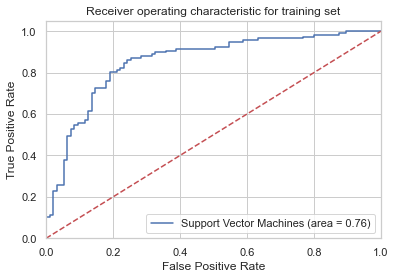

In [66]:
# Look at ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_train = roc_auc_score(y_train_svm, classifier.predict(X_train_svm))
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_svm, classifier.predict_proba(X_train_svm)[:,1])
plt.figure()
plt.plot(fpr_train, tpr_train, label='Support Vector Machines (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training set')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

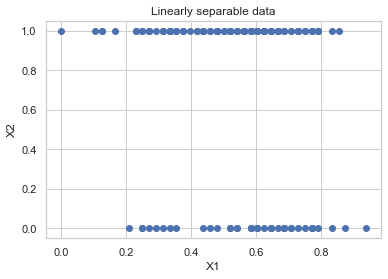

In [59]:
# Visualizing the classifier with training data
# Generate scatter plot for training data 
import matplotlib.pyplot as plt

vals = X_train_svm.values
vals = vals.astype('float32')
train_size = int(len(vals) * 0.67)
train_dataset_svm = vals[0:train_size,:]

plt.scatter(train_dataset_svm[:,0], train_dataset_svm[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

<h3> Hyperparameter Tuning </h3>

In [71]:
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=rd)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_svm, y_train_svm.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765108 using {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.735368 (0.092429) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.715411 (0.100381) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.634762 (0.111754) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.765108 (0.094899) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.725390 (0.096960) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.639437 (0.111569) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.756277 (0.079128) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.747229 (0.085295) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.636364 (0.101361) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.737359 (0.073742) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.719264 (0.091759) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.721818 (0.073542) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.577900 (0.054895) with: {'C': 0.01, 'gamma': 'scale',